# ECS 22 - Lab 5: Rheology

This lab is designed to explore some of the common mathematical relationships used to relate stress to strain in rocks. These mathematical formulations are critically important because they are frequently the basis for numerical models of all kinds of Earth processes, which are increasingly common. This lab is also designed to expose you to some of the ways that coding in Python can be useful for exploring concepts in structural geology and other disciplines in the Earth Sciences

### Python Basics

Many common mathematical operations are relatively straightforward in Python. Below are some basic examples of how to assign variables, do arithmetic, and print output. Feel free to modify and run the cell to see how the output changes.

In [36]:
x = 5
y = 7
z = x*y
print(z)

35


### Python Packages

For more advanced math and plotting, we will need to import the packages `numpy` and `matplotlib` and assign them shorthands (`np` and `plt`). Run the cell below to import these packages. If there is no output, that is good! It means the imports were successful.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

`numpy` lets us do mathematical operations like trig functions. the below code converts 45 degrees to radians (because numpy does trig functions in radians) and then takes the tangent of the resulting value. Try changing the value and seeing how the answer changes, or try a different trig function.

In [38]:
x = np.tan(np.radians(45))
print(x)

0.9999999999999999


`matplotlib` allows us to plot things. The below code creates a `numpy` array of angles ranging from 0 to 90 degrees, converts them to radians, and gets the tangent of each one. Then, `matplotlib` plots the angles on the x axis and the tangents on the y axis. Note that we can add comments directly to Python code by starting lines with `#`, which tells Python not to run the line as code

Text(0, 0.5, 'Tangents')

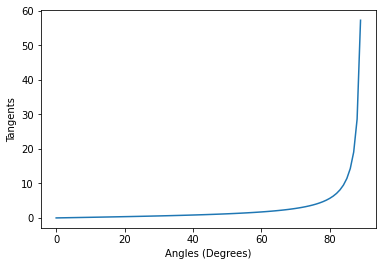

In [39]:
# Creates an array of values from 0 to 90
angles = np.arange(0,90,1)

# Converts angles from degrees to radians
angles_radians = np.radians(angles)

# Takes tangent of each angle
tangents = np.tan(angles_radians)

# Plots angles vs. tangents
plt.plot(angles,tangents)

# Sets x and y axes labels
plt.xlabel('Angles (Degrees)')
plt.ylabel('Tangents')

### Elastic Deformation

In elastic deformation, material undergoes strain (e) in response to stress ($\sigma$), but all of the strain is recoverable (i.e., the material returns to its original shape when the stress is removed). This is often visualized using a spring, and the relationship between stress and strain is often linear:

<img src='elastic.png' width='800'>

This linear relationship is called __Hooke's Law__, and the factor _E_ relating stress to strain is __Young's Modulus__ or the __elastic modulus__.

$\sigma = Ee$

1. Using Python code below, calculate the elastic modulus for a rock with 20% elastic elongation at 150 MPa. Note that the elastic modulus is not dimensionless.

In [40]:
# Calculate elastic modulus for a rock with 20% extension at 150 MPa. Print the elastic modulus.

sigma = 150 #MPa
e = 0.2
elastic = sigma/e

print(elastic, ' MPa')

750.0  MPa


Below is a table of elastic moduli for some common Earth materials:

<img src='elastic_table.png' width=350>

2. Create a `numpy` array of possible elastic moduli for gabbro in increments of 10 MPa. Make a plot of stress vs. strain showing the stress for each of these elastic moduli. The functions you need have been written below and can be used by removing the `#` and modifying the appropriate values.

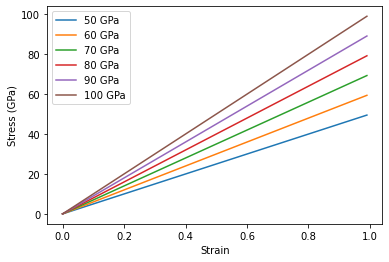

In [41]:
# Make an array of strains from 0% to 100%
strains = np.arange(0,1,0.01)

# Make an array of all gabbro moduli
moduli = np.arange(50,100+1,10) # GPa

# Calculate stress for each of these moduli
for modulus in moduli:
    stresses = strains*modulus
    plt.plot(strains,stresses,label=str(modulus) + ' GPa')

# Add labels to the axes and a legend
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
plt.legend()

# Save the plot
plt.savefig('out_moduli.jpg')

3. What stresses are needed to cause 40% elongation in gabbro with each of these elastic modulii? For this, you can use the `np.where` function.

In [42]:
for modulus in moduli:
    stresses = strains*modulus
    stress_40 = stresses[np.where(strains==0.4)]
    print('Elastic Modulus: ',modulus,' GPa')
    print('Stress at 40% elongation: ', float(stress_40),' GPa')
    print('')

Elastic Modulus:  50  GPa
Stress at 40% elongation:  20.0  GPa

Elastic Modulus:  60  GPa
Stress at 40% elongation:  24.0  GPa

Elastic Modulus:  70  GPa
Stress at 40% elongation:  28.0  GPa

Elastic Modulus:  80  GPa
Stress at 40% elongation:  32.0  GPa

Elastic Modulus:  90  GPa
Stress at 40% elongation:  36.0  GPa

Elastic Modulus:  100  GPa
Stress at 40% elongation:  40.0  GPa



### Viscous and Plastic Deformation

Elasticity is particularly relevant in the brittle regime, where materials essentially deform elastically until they reach some critical stress that induces mechanical fracturing, faulting, and earthquakes. Below the brittle-ductile transition (~10 km), rocks tend to accumulate permanent viscous or plastic deformation without brittle failure.

#### Viscous Deformation

At high temperatures and million-year timescales, rocks can effectively behave like fluids (i.e., they have a viscous rheology). Some fluids are __Newtonian__, meaning that there is a linear relationship between stress and strain, depending on the __viscosity__ ($\eta$ - resistance to flow) of the fluid:

$\sigma_s = \eta \dot \gamma$

$\sigma_n = \eta \dot e$

Note that in these formulas, $\dot \gamma$ is shear strain _rate_ and $\dot e$ is elongation strain _rate_. Strain rate refers to strain over a period of time and has units of per unit time (e.g., $s^{-1}, yr^{-1}, Myr^{-1})$. Since this strain is permanent, strain will accumulate with time at the same amount of stress.

This is often visualized using a dashpot, which requires a fluid (like air) to flow to be extended, and the resistance to extension is determined by the viscosity of the fluid:

<img src=dashpots.jpg width=400>

<img src=linear_viscous.png width=800>

1. Using the Python code from the elastic deformation code above as a model, plot normal stress ($\sigma_n$) vs. strain rate ($\dot e$) for normal stresses up to 100 GPa for fluids with viscosities of $1 \cdot 10^{16} Pa \cdot s$ and $1 \cdot 10^{20} Pa \cdot s$ (in Python you can represent these in scientific notation as `1e16` and `1e20`). Use a log-log scale (`plt.loglog`) to visualize the results. 

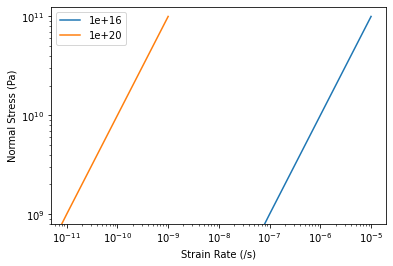

In [46]:
# Make array of stresses
stresses_GPa = np.arange(0,100+1,1) # GPa

# Convert to Pa
stresses_Pa = stresses_GPa * 1e9 #Pa

# Define viscosities
visc1 = 1e16 # Pa*s
visc2 = 1e20 # Pa*s

# Calculate strain rates
strain_rate1 = stresses_Pa/visc1
strain_rate2 = stresses_Pa/visc2

# Plot

plt.plot(strain_rate1,stresses_Pa,label=visc1)
plt.plot(strain_rate2,stresses_Pa,label=visc2)
plt.xlabel('Strain Rate (/s)')
plt.ylabel('Normal Stress (Pa)')
plt.loglog()
plt.legend()
plt.savefig('out_newtonian.jpg')



2. What strain rates correspond to 10 GPa for each viscosity?

In [44]:
sr_10_visc1 = strain_rate1[np.where(stresses_GPa==10)]
sr_10_visc2 = strain_rate2[np.where(stresses_GPa==10)]

print('Viscosity: ',visc1,' Pa*s')
print('Strain rate at 10 GPa: ', float(sr_10_visc1),' /s')
print('')

print('Viscosity: ',visc2,' Pa*s')
print('Strain rate at 10 GPa: ', float(sr_10_visc2),' /s')
print('')

Viscosity:  1e+16  Pa*s
Strain rate at 10 GPa:  1e-06  /s

Viscosity:  1e+20  Pa*s
Strain rate at 10 GPa:  1e-10  /s



In reality, flowing rocks generally do not behave as Newtonian fluids, and there is frequently a fundmaentally non-linear relationship between stress, strain rate, and viscosity. Viscosity itself is highly dependent on a number of variables, and the equation for viscosity frequently takes the form of a __power law__ equation, in which the relationship between viscosity and strain rate is dependent on either a stress exponent (n) or a grain size exponent (m):

$\eta = \frac{1}{2} A^{\frac{-1}{n}} d^{\frac{m}{n}} \dot e^{\frac{1-n}{n}} exp(\frac{E+PV}{nRT})$

Using this particular formulation of viscosity, the relationship between stress and strain rate is:

$\sigma = 2 \eta \dot{\epsilon}$

The choice of stress and grain size exponents depends on the microscopic deformation mechanism that is allowing viscous deformation to occur. For dislocation creep, one of the more common mechanisms, only the stress exponent is relevant and m=0, resulting in:

$\eta = \frac{1}{2} A^{\frac{-1}{n}} \dot e^{\frac{1-n}{n}} exp(\frac{E+PV}{nRT})$

Here, A is called a viscous prefactor, E is activation energy, and V is activation volume, all of which are constant for particular materials. Pressure (P) and temperature (T) are dependent upon depth, and R is the gas constant (8.31451 $J/K \cdot mol$).

3. Below, you have arrays for 